# Missing value, Outlier, dan Transformasi data 

Nama: Iin Febyanti

NPM: 23083010006

Kelas: Analisis Data Eksploratif A

 Dataset ini dilakukan pengecekan missing value dan outlier serta mentransformasikan data untuk membantu mempersiapkan dataset yang lebih bersih dan siap untuk analisis lanjutan. Karena dengan adannya missing value dan outlier bisa mengganggu analisis data dan membuat hasil model menjadi tidak akurat

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/IIN FEBYANTI/OneDrive/Sains Data/smoking.csv")
data.head()
data

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


# Mengecek missing value

In [2]:
data.isnull().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

# Menghapus missing value 
Jumlah data yang mengalami missing value (amt_weekends, amt_weekdays, dan type) sebesar 75,1% dari data yang tersedia dan data tersebut tidak mempengaruhi data yang lain ketika dihapus. Karena data yang missing value ini merupakan data dari orang yang tidak merokok, sehingga tidak akan ada amt_weekends, amt_weekdays, dan type pada data tersebut.

In [3]:
df = data.dropna(subset=['amt_weekends', 'amt_weekdays', 'type'])
df.head()
df

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
8,9,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,10,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets
20,21,Female,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,Yes,6.0,12.0,Packets
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,1675,Female,31,Single,GCSE/O Level,Scottish,White,"15,600 to 20,800",Scotland,Yes,20.0,10.0,Packets
1680,1681,Male,24,Single,No Qualification,Scottish,White,"Under 2,600",Scotland,Yes,15.0,15.0,Hand-Rolled
1683,1684,Male,35,Married,No Qualification,Scottish,White,"10,400 to 15,600",Scotland,Yes,3.0,12.0,Packets
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled


# Mengecek outlier
Dengan membuat boxplot kita bisa melihat outlier pada data tersebut.

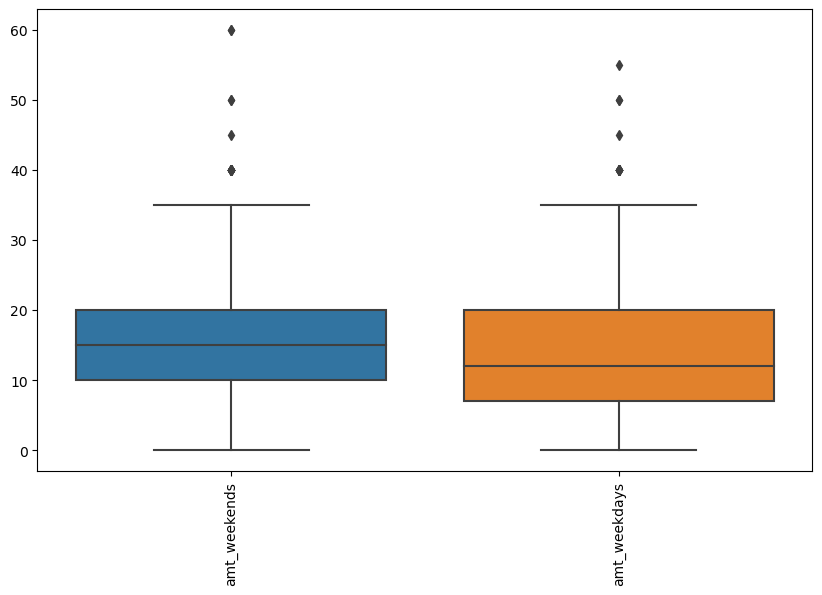

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amt_weekends', 'amt_weekdays']])
plt.xticks(rotation=90)
plt.show()

# Mengganti nilai outliers dengan nilai mean
Karena data ini berdistribusi normal (tidak banyak outliers) maka mengganti outliers dengan mean akan tetap mencerminkan kebiasaan merokok dari populasi data tersebut (tidak akan terlalu mempengaruhi hasil keseluruhan).

In [5]:
data_fix = df.copy()

for column in ['amt_weekends', 'amt_weekdays']:
    Q1 = data_fix[column].quantile(0.25)
    Q3 = data_fix[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mean = data_fix[column].mean()  
    data_fix[column] = data_fix[column].apply(
        lambda x: mean if x < lower_bound or x > upper_bound else x  
    )

data_fix.head()  

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
8,9,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,10,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets
20,21,Female,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,Yes,6.0,12.0,Packets


# Melakukan transformasi data dan memvisulaisasikan data sebelum dan sesudah transformasi

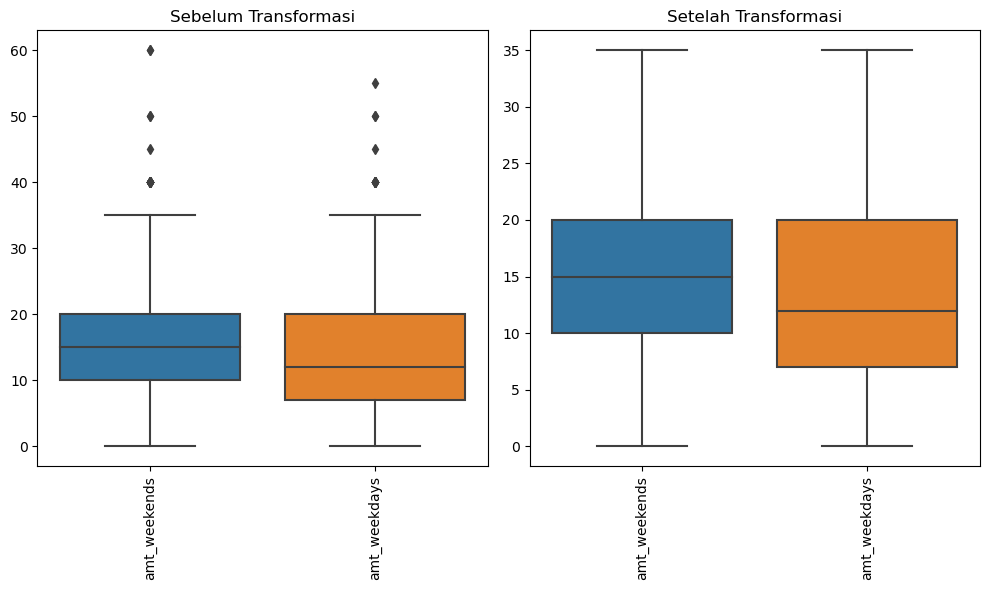

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi data sebelum transformasi
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['amt_weekends', 'amt_weekdays']])
plt.title('Sebelum Transformasi')
plt.xticks(rotation=90)

# Transformasi data dengan mengganti outliers dengan nilai mean
data_fix = df.copy()

for column in ['amt_weekends', 'amt_weekdays']:
    Q1 = data_fix[column].quantile(0.25)
    Q3 = data_fix[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mean = data_fix[column].mean()  # Calculate the mean of the column
    data_fix[column] = data_fix[column].apply(
        lambda x: mean if x < lower_bound or x > upper_bound else x  # Replace with mean
    )

# Visualisasi data setelah transformasi
plt.subplot(1, 2, 2)
sns.boxplot(data=data_fix[['amt_weekends', 'amt_weekdays']])
plt.title('Setelah Transformasi')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Boxplot data sebelum dilakukan transformasi data masih terdapat outlier di dalamnya. Namun setelah dilakukan transformasi data boxplot data tersebut sudah bersih tidak ada outliernya lagi.